# Final Project 
Jesus Olivera, Pujita Ravichandar

## Introduction
<br>
Climate change poses a great risk to humanity. Thermometer readings around the world have been rising, and the causes are attributed to a blend of human activity and some natural variability.
<br>


Climate change poses a greater risk to Small Island Developing States (SIDS) and Least Developed Countries (LDCs). They are least able to recover from climate stresses and their economic growth is highly dependent on climate-sensitive sectors.
<br>


Between 1970 and 2019, 79% of natural disasters worldwide involved weather and climate related hazards. It is expected that climate change will threaten years of development progress and increase the number of people living in poverty, adding as many as 122 million more people by 2030. 
<br>


Scientists have high confidence that the global temperatures will continue to rise for decades to come, largely due to the greenhouse gases produced by human activity.
<br>


In our research we seek to understand the relationship between temperature anomalies, glaciers mass and deaths by natural disasters.

## Research Questions
<br>
Our research topic can be summarized in the following sentence. How are global temperatures affecting the weather and safety of our planet? 

**This question can be broken down into the following sub questions:**

<br>

* What are the trends in global surface temperature?
* How do global temperature trends affect glaciers?
* How do global temperature trends affect the number of deaths by natural disasters?


### Importing all libraries to be used

In [1]:
import requests
import pandas as pd
import json
import urllib.request
from lxml import objectify
from io import StringIO
from pprint import pprint
from pandas import DataFrame
import numpy as np
import re
import csv
from bs4 import BeautifulSoup
from html.parser import HTMLParser
from urllib import request
import lxml.html as lh
import urllib
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns
import scipy

import geopandas as gpd

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Phase 1 - Data Acquisition, Data Preparation & Exploratory Data Analysis


### Data Acquisition: Surface Temperature  Anomaly

There are five data sources used for this project. The data acquitison, preparation, and EDA are detailed below.
<br>


1. Our World Data: Surface temperature data. GISTEMP surface temperature anomaly, 2017. The temperature data is measured in degrees Celsius and it is relative to the 1951 – 1980 global average temperature. The data is based on the GISTEMP analysis from the NASA Goddard Institute for Space Studies. From this source we extracted necessary data regarding global surface temperature by region and year. The data was collected from this source via csv.

**GISTEMP surface temperature anomaly, 2017** (https://ourworldindata.org/grapher/surface-temperature-anomaly-gistemp?time=2017).
<br>
 
 
Explanation of "Surface Temperature Anomaly": The land surface temperature can be compared to how warm or cool the earth feels if you were to touch it. From the satellite's point of view, it is what it sees when it looks at the ground through the atmosphere. There is a difference between land an air surface temperature. Here, an anomaly can be defined as an instance when conditions depart from the average conditions of a particular place at a given time of the year. For our dataset, the anomaly values are given with a country and a year.  Surface temperature anomalies are very insightful for learning about weather patterns, environmental changes, and global warming, among others.

In [2]:
# GISTEMP surface temperature anomaly, 2017

read = pd.read_csv("https://raw.githubusercontent.com/jaynuel/AIM-5001/master/surface-temperature-anomaly-gistemp.csv")
#read.head(3)


### Data Preparation: Global Surface Temperature Anomaly


In [3]:
# Looking for null values
print(read.isnull().sum())

# Shape of the data
print(read.shape)

Entity                          0
Code                           92
Year                            0
Surface temperature anomaly     0
dtype: int64
(23127, 4)


In [4]:
# Finding null values 
is_nan = read.isnull()
row_with_nan = is_nan.any(axis=1)
nan_rows = read[row_with_nan]

# Finding unique countries with "NaN" country code
nan_rows.Entity.unique()

array(['Micronesia'], dtype=object)

The dataframe is missing the 3 digit country code for Micronesia. To replace the "NaN" values for "FSM" the function "replace" was applied.

In [5]:
# Replacing "NaN" values for Micronesia 3 digit ISO code: FSM

read['Code'] = read['Code'].replace(np.NaN, 'FSM')

# Reviewing if "NaN" values were replaced 
read.isnull().sum()

Entity                         0
Code                           0
Year                           0
Surface temperature anomaly    0
dtype: int64

In [6]:
# Confirming updates were applied
micronesia_code = read.loc[read['Code']== 'FSM']
print(micronesia_code)

# Confirming all codes are correct
print(read.Code.unique())


           Entity Code  Year  Surface temperature anomaly
13053  Micronesia  FSM  1921                        -0.70
13054  Micronesia  FSM  1922                        -0.65
13055  Micronesia  FSM  1923                        -0.84
13056  Micronesia  FSM  1924                        -0.71
13057  Micronesia  FSM  1925                        -0.57
...           ...  ...   ...                          ...
13140  Micronesia  FSM  2013                         0.94
13141  Micronesia  FSM  2014                         0.64
13142  Micronesia  FSM  2015                         0.71
13143  Micronesia  FSM  2016                         1.23
13144  Micronesia  FSM  2017                         1.18

[92 rows x 4 columns]
['AFG' 'ALB' 'DZA' 'AND' 'AGO' 'ATA' 'ATG' 'ARG' 'ARM' 'AUS' 'AUT' 'AZE'
 'BHS' 'BHR' 'BGD' 'BRB' 'BLR' 'BEL' 'BLZ' 'BEN' 'BTN' 'BOL' 'BIH' 'BWA'
 'BRA' 'BRN' 'BGR' 'BFA' 'BDI' 'KHM' 'CMR' 'CAN' 'CPV' 'CAF' 'TCD' 'CHL'
 'CHN' 'COL' 'COM' 'COG' 'CRI' 'CIV' 'HRV' 'CUB' 'CYP' 'CZE' '

As results show above, some country codes have "OWID_" before the country code. To update the dataframe the function "replace" was used.

In [7]:
# Replacing "OWID_" for actual country code
read = read.replace('OWID_KOS','KOS')
read = read.replace('OWID_CYN','CYN')

# Confirming values were replaced
read.Code.unique()

array(['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'ATA', 'ATG', 'ARG', 'ARM',
       'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL',
       'BLZ', 'BEN', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'BRN', 'BGR',
       'BFA', 'BDI', 'KHM', 'CMR', 'CAN', 'CPV', 'CAF', 'TCD', 'CHL',
       'CHN', 'COL', 'COM', 'COG', 'CRI', 'CIV', 'HRV', 'CUB', 'CYP',
       'CZE', 'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV',
       'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'FJI', 'FIN', 'FRA', 'GAB',
       'GMB', 'GEO', 'DEU', 'GHA', 'GRC', 'GRD', 'GTM', 'GIN', 'GNB',
       'GUY', 'HTI', 'HND', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ',
       'IRL', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'KOS',
       'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE',
       'LTU', 'LUX', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MHL',
       'MRT', 'MUS', 'MEX', 'FSM', 'MDA', 'MCO', 'MNG', 'MNE', 'MAR',
       'MOZ', 'MMR', 'NAM', 'NRU', 'NPL', 'NLD', 'NZL', 'NIC', 'NER',
       'NGA', 'PRK',

### Exploratory Data Analysis: Surface Temperature  Anomaly


In [8]:
# Analyzing the dataset using the describe function to get a statistical summary
read.describe().round(2)

,Year,Surface temperature anomaly
count,23127.00,23127.00
mean,1955.10,0.14
std,37.82,0.67
min,1880.00,-4.70
25%,1925.00,-0.26
50%,1958.00,0.11
75%,1987.00,0.52
max,2017.00,3.41


In [9]:
# Understanding the distribution of the dataset per country
read['Entity'].value_counts().sort_values()

Solomon Islands           38
Oman                      44
Sao Tome and Principe     53
Timor                     60
Vanuatu                   61
                        ... 
Estonia                  138
Saudi Arabia             138
Canada                   138
Italy                    138
Lithuania                138
Name: Entity, Length: 198, dtype: int64

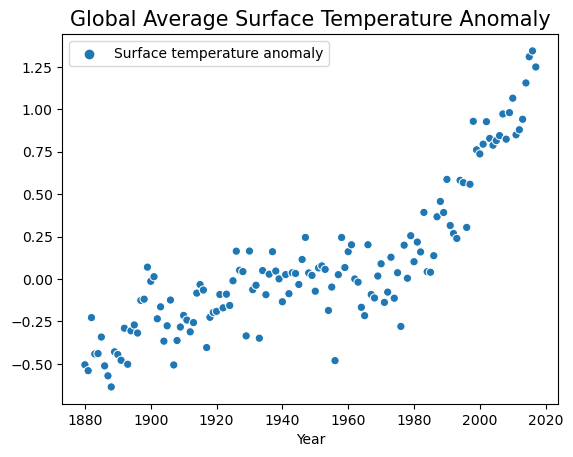

In [10]:
# Groupping by 'year'
temp_country = read.groupby(['Year']).mean()

sns.scatterplot(data = temp_country)
plt.title("Global Average Surface Temperature Anomaly", size=15)
plt.show()

### Exploratory Data Analysis: Global Surface Temperature Anomaly - Results

Based on the scatter plots above and the choropleth map coming up in the bext phase, this dataset contains information about global surface temerpature anomalies ranging from 1881 to 2017 for 198 countries. Each country has a surface temperature anomaly value for this range of years. The scatter plot below shows the average surface temperature anomalies of all the countries by year. This graph shows a sharp increase in the global surface temperature over time. There is a particularly steep increase from 1980 onwards. Especially compared to the years of 1880 to 1980, we can clearly see an increase in the global surface temperature trends.

https://earthobservatory.nasa.gov/global-maps/MOD_LSTAD_M

### Data Acquisition: Deaths Caused By Natural Disasters


2. Deaths caused by natural distasters by country and year. The data set contains the name of the country, the country code, the year and the total deaths due to natural disasters. The data needed was collected from this source via csv. (https://ourworldindata.org/natural-disasters)

**CSV:**https://raw.githubusercontent.com/jaynuel/AIM-5001/master/deaths-natural-disasters-ihme.csv


In [11]:
# Deaths by natural disasters
read1 = pd.read_csv("https://raw.githubusercontent.com/jaynuel/AIM-5001/master/deaths-natural-disasters-ihme.csv")
deaths_by_country = read1.rename(columns={"Deaths - Exposure to forces of nature - Sex: Both - Age: All Ages (Number)":"Total_Deaths"})

# Printing Results
deaths_by_country.head(3)

,Entity,Code,Year,Total_Deaths
0,Afghanistan,AFG,1990,0.000000
1,Afghanistan,AFG,1991,1349.999434
2,Afghanistan,AFG,1992,614.000083


### Data Preparation: Deaths Caused By Natural Disasters

In [12]:
# Looking for null values
print(deaths_by_country.isnull().sum())

# Shape of the data
print(deaths_by_country.shape)

Entity            0
Code            980
Year              0
Total_Deaths      0
dtype: int64
(6468, 4)


In [13]:
# Finding null values 
nan_values = deaths_by_country[deaths_by_country['Code'].isna()]
nan_values.Entity.unique()

array(['Andean Latin America', 'Australasia', 'Caribbean', 'Central Asia',
       'Central Europe',
       'Central Europe, Eastern Europe, and Central Asia',
       'Central Latin America', 'Central Sub-Saharan Africa', 'East Asia',
       'Eastern Europe', 'Eastern Sub-Saharan Africa', 'England',
       'High SDI', 'High-income', 'High-income Asia Pacific',
       'High-middle SDI', 'Latin America and Caribbean', 'Low SDI',
       'Low-middle SDI', 'Middle SDI', 'North Africa and Middle East',
       'North America', 'Northern Ireland', 'Oceania', 'Scotland',
       'South Asia', 'Southeast Asia',
       'Southeast Asia, East Asia, and Oceania', 'Southern Latin America',
       'Southern Sub-Saharan Africa', 'Sub-Saharan Africa',
       'Tropical Latin America', 'Wales', 'Western Europe',
       'Western Sub-Saharan Africa'], dtype=object)

Results above show that the reason why the dataframe contains "NaN" values on the "Code" column is because the values were also classified per region. To make sure that the dataframe is consistent, all the rows containing "NaN" values will be dropped from the "death_by_country" dataframe.

In [14]:
# Dropping rows containing "NaN" values from "deaths_by_country" dataframe and 
# re-seting index values
deaths_by_country = deaths_by_country.dropna().reset_index(drop=True)

# Confirming "NaN" values were dropped from "deaths_by_country"
print(deaths_by_country.isnull().sum())


Entity          0
Code            0
Year            0
Total_Deaths    0
dtype: int64


In [15]:
# Removing groupped values to ensure only individual country values are contained in dataframe 
# to be used in analysis

deaths_by_country.drop(deaths_by_country[deaths_by_country['Entity']== 'World'].index, inplace=True)


### Exploratory Data Analysis: Deaths Caused By Natural Disasters

In [16]:
# Analyzing the dataset using the describe function to get a statistical summary

# Printing bold title
print('\033[1m'+'Deaths by Country'+'\033[0m')
# Results
print(deaths_by_country.describe().round(2))


Deaths by Country
          Year  Total_Deaths
count  5460.00       5460.00
mean   2003.50        261.24
std       8.08       4990.05
min    1990.00          0.00
25%    1996.75          0.00
50%    2003.50          0.00
75%    2010.25         12.00
max    2017.00     222658.31


In [17]:
# Understanding the distribution of the dataset per country

# Printing bold title
print('\033[1m'+'Deaths by Country'+'\033[0m')
# Printing Results
print(deaths_by_country['Entity'].value_counts().sort_values().head(5))


Deaths by Country
Niger      28
Eritrea    28
Russia     28
Bahrain    28
Bahamas    28
Name: Entity, dtype: int64


In [18]:
# Analysing the distribution of the dataset "deaths_by_country" by year 
deaths_by_country.groupby('Year').Entity.agg(['count']).head(5)

,count
Year,
1990,195
1991,195
1992,195
1993,195
1994,195


In [19]:
# Calculating the total deaths by year using the "deaths_by_country" dataset
total_by_country = deaths_by_country.groupby('Year').Total_Deaths.agg(['sum']).round()
total_by_year = deaths_by_country.groupby('Entity').Total_Deaths.agg(['sum']).round()

print(total_by_country.head(5))
print(total_by_year.head(5))

           sum
Year          
1990   50187.0
1991  149891.0
1992   11529.0
1993   21305.0
1994   11530.0
                    sum
Entity                 
Afghanistan     14738.0
Albania            36.0
Algeria          4026.0
American Samoa     41.0
Andorra             0.0


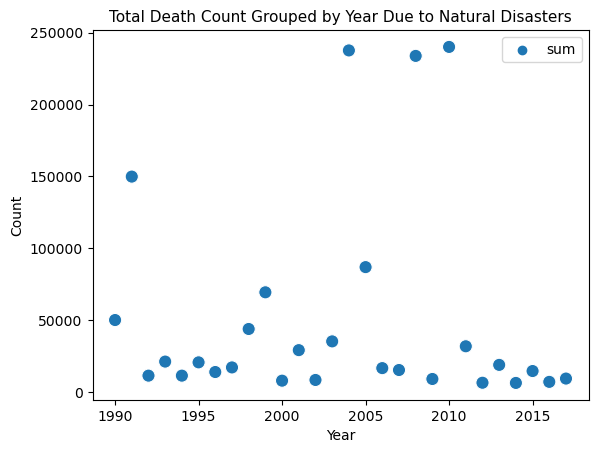

In [20]:
# Visualization of total deaths by year using the "deaths_by_country" dataframe
sns.scatterplot(data=total_by_country, s=90)
plt.ylabel('Count', fontsize=10)
plt.title('Total Death Count Grouped by Year Due to Natural Disasters', fontsize=11)
plt.show()

## Understanding the Outliers

In [21]:
# Returning largest values per all years to analyse outliers
outliers_deaths = total_by_country.nlargest(4, 'sum')

# Printing results
outliers_deaths

,sum
Year,
2010,240034.0
2004,237601.0
2008,233796.0
1991,149891.0


In [22]:
# Returning countries with the largest number of deaths by natural disasters
total_by_year.nlargest(4, 'sum')

,sum
Entity,
Haiti,227488.0
Indonesia,185304.0
Bangladesh,154153.0
Myanmar,139682.0


In [23]:
# Printing rows containing results + bold titles. A line break was printed for 
# an easier results reading

print('\033[1m' +'Haiti: 2010 Earthquake'+'\033[0m')
print(deaths_by_country.loc[deaths_by_country['Entity']=='Haiti'].nlargest(1,'Total_Deaths'))

print('')
print('\033[1m' +'Indonesia: 2004 Indian Ocean Earthquake & Tsunami'+'\033[0m')
print(deaths_by_country.loc[deaths_by_country['Entity']=='Indonesia'].nlargest(1,'Total_Deaths'))

print('')
print('\033[1m' +'Bangladesh: 1991 Cyclone'+'\033[0m')
print(deaths_by_country.loc[deaths_by_country['Entity']=='Bangladesh'].nlargest(1,'Total_Deaths'))

print('')
print('\033[1m' +'Myanmar: 2008 Cyclone Nargis'+'\033[0m')
print(deaths_by_country.loc[deaths_by_country['Entity']=='Myanmar'].nlargest(1,'Total_Deaths'))


Haiti: 2010 Earthquake
     Entity Code  Year  Total_Deaths
2148  Haiti  HTI  2010   222658.3065

Indonesia: 2004 Indian Ocean Earthquake & Tsunami
         Entity Code  Year  Total_Deaths
2282  Indonesia  IDN  2004   166041.1199

Bangladesh: 1991 Cyclone
         Entity Code  Year  Total_Deaths
393  Bangladesh  BGD  1991   139252.1216

Myanmar: 2008 Cyclone Nargis
       Entity Code  Year  Total_Deaths
3350  Myanmar  MMR  2008   138366.4963


In [24]:
deaths_by_country.head()

,Entity,Code,Year,Total_Deaths
0,Afghanistan,AFG,1990,0.000000
1,Afghanistan,AFG,1991,1349.999434
2,Afghanistan,AFG,1992,614.000083
3,Afghanistan,AFG,1993,109.999998
4,Afghanistan,AFG,1994,160.000003


### Exploratory Data Analysis: Deaths Caused by Natural Disasters - Results

Based on the scatter plot above, this dataset contains information about the deaths caused by natural disasters from 1990 to 2017. Each country has a number of total deaths by natural disasters for this range of years. The scatter plot below shows the sum od deaths for all of the countries by year. This graph does not have a steady increasing trend like the surface temperature anomaly graphs. However, there are significant peaks in this graphs that are interesting to look at. These peaks happen during the years of 1991, 2004, 2008, and 2010 and are the results of very damaging natural disasters. The details of these events are below.

The peaks of this dataset reflects the devastating effects of 4 natural disasters:

1. **Bangladesh** 1991 cyclone: The cyclone made landfall in southeastern Bangladesh around the time of high tide, which was already 5.5 m (18 ft) above normal; in addition, the cyclone produced a 6.1 m (20 ft) storm surge that inundated the coastline. The storm also brought winds of around 240 km/h (150 mph). Winds exceeding 220 km/h (137 mph) lashed a populated region of the coast for about 12 hours, as well as 12 offshore islands.(https://en.wikipedia.org/wiki/1991_Bangladesh_cyclone)
<br>

2. **Indonesia** 2004 Indian Ocean Earthquake & Tsunami:The 2004 Indian Ocean earthquake and tsunami (also known as the Boxing Day Tsunami and, by the scientific community, the Sumatra–Andaman earthquake) occurred at 07:58:53 in local time (UTC+7) on 26 December, with an epicentre off the west coast of northern Sumatra, Indonesia. It was an undersea megathrust earthquake that registered a magnitude of 9.1–9.3 Mw, reaching a Mercalli intensity up to IX in certain areas. The earthquake was caused by a rupture along the fault between the Burma Plate and the Indian Plate.(https://en.wikipedia.org/wiki/2004_Indian_Ocean_earthquake_and_tsunami)
<br>

3. **Myanmar** 2008 Cyclone Nargis: Extremely Severe Cyclonic Storm Nargis was an extremely destructive and deadly tropical cyclone that caused the worst natural disaster in the recorded history of Myanmar during early May 2008. The cyclone made landfall in Myanmar on Friday, 2 May 2008, sending a storm surge 40 kilometres up the densely populated Irrawaddy delta, causing catastrophic destruction. (https://en.wikipedia.org/wiki/Cyclone_Nargis)
<br>

4. **Haiti** 2010 Earthquake: The 2010 Haiti earthquake (French: Séisme de 2010 à Haïti; Haitian Creole: Tranblemanntè 12 janvye 2010 nan peyi Ayiti) was a catastrophic magnitude 7.0 Mw earthquake, with an epicenter near the town of Léogâne (Ouest) and approximately 25 kilometres (16 mi) west of Port-au-Prince, Haiti's capital. The earthquake occurred at 16:53 local time (21:53 UTC) on Tuesday, 12 January 2010.(https://en.wikipedia.org/wiki/2010_Haiti_earthquake) 




### Data Acquisition: Glacier Mass Balance

3. DataHub.io: Core/Glacier-Mass-Balance. Average cumulative balance of “reference” glaciers worldwide from 1945-2014 from US EPA and World Glacier Monitoring Service (WGMS). This is cumulative change in mass balance of set of “reference” glaciers worldwide. The values represent the average of all the glaciers that were measured. Negative values indicate a net loss of ice and snow compared with the base year of 1945.From this source we will be able to extract necessary data regarding glaciers mass worldwide by year. The data needed will be collected from this source via Web Scraping.

**Datahub.io: Average cumulative mass balance of reference glaciers worldwide** (https://datahub.io/core/glacier-mass-balance#data).

In [25]:
# Web Scapping Data
r = requests.get('https://pkgstore.datahub.io/core/glacier-mass-balance/glaciers_csv/data/c04ec0dab848ef8f9b179a2cca11b616/glaciers_csv.csv').text
data = StringIO(r)
glacier = pd.read_csv(data, sep=",")

# Printing dataframe
glacier.head(3)

,Year,Mean cumulative mass balance,Number of observations
0,1945,0.00,NaN
1,1946,-1.13,1.0
2,1947,-3.19,1.0


### Data Preparation: Glacier Mass Balance


In [26]:
# Looking for null values
print(glacier.isnull().sum())

# Shape of the data
print(glacier.shape)

Year                            0
Mean cumulative mass balance    0
Number of observations          1
dtype: int64
(70, 3)


In [27]:
# Replacing "NaN" value for 0
glacier = glacier.replace(np.NaN,0)

# Confirming value was replaced
print(glacier.isnull().sum())
print(glacier.head(1))

Year                            0
Mean cumulative mass balance    0
Number of observations          0
dtype: int64
   Year  Mean cumulative mass balance  Number of observations
0  1945                           0.0                     0.0


### Exploratory Data Analysis: Glacier Mass Balance


In [28]:
# Analyzing the dataset using the describe function to get a statistical summary
glacier.describe().round(2)

,Year,Mean cumulative mass balance,Number of observations
count,70.00,70.00,70.00
mean,1979.50,-12.84,27.36
std,20.35,6.58,13.07
min,1945.00,-28.65,0.00
25%,1962.25,-16.34,20.50
50%,1979.50,-11.22,35.50
75%,1996.75,-9.14,37.00
max,2014.00,0.00,37.00


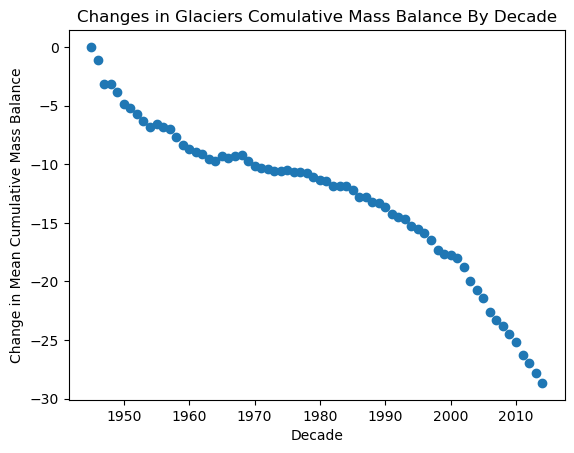

In [29]:
# Visualizing changes of glaciers mean comulative mass balance by decade using Matplotlib

x = glacier[['Year']]
y = glacier[['Mean cumulative mass balance']]

g1 = plt.scatter(x,y)
g1 = plt.title('Changes in Glaciers Comulative Mass Balance By Decade')
g1 = plt.xlabel('Decade')
g1 = plt.ylabel('Change in Mean Cumulative Mass Balance')
g1 = plt.show()
g1


In [30]:
glacier['Year'].min()

1945

### Exploratory Data Analysis: Glacier Mass Balance - Results

Based on the scatter plot above, this dataset contains information about the mean cumulative mass balance of glaciers ranging from 1945 to 2014 for 1glaciers worldwide. Each year has information about the cumulative mass balance of the glaciers and the number of observations associated with this observation. The scatter plot above shows the the change in the mean cumulative mass balance by year. This graph shows a steady decrease in the mass of the glaciers over time. This intuatively fits with our EDA showing the steady increase of global surface temperature. There is a particularly steep decline from around 1980 onwards.

### Data Acquisition: Climate Projections


4. Climate Impact Lab: Daily climate projections based on representative concentration pathway 2.6, 4.5, and 8.5 (Van Vuuren et al., 2012) experiments run by global climate models participating in the Coupled Model Intercomparison Project Phase 5 (CMIPS) exercise (Taylor et al., 2012). The projections were aggregated to regional estimates by first transforming the daily min, average, or maximum temperatures at the grid scale, then aggregating to regions using a weighted average. From this source we will be able to extract necessary data regarding climate projections by region and year. The data needed was collected from this source as a CSV format.

**Climate Impact Lab: Global Map** (http://www.impactlab.org/map/#usmeas=absolute&usyear=1981-2010&gmeas=absolute&gyear=1986-2005&tab=global).

In [31]:
# Climate projections
r3= requests.get('https://raw.githubusercontent.com/jaynuel/AIM-5001/master/Climate-Impact-Lab_Global-Data%20(2).csv')
r4 = r3.text
data = StringIO(r4)
projections = pd.read_csv(data, sep=",")

# Printing dataframe
projections.head(3)

,Country,Average,5th,50th,95th,5th.1,50th.1,95th.1,5th.2,50th.2,95th.2
0,Aruba,80.6,81.1,82.1,83,81.3,83.2,84.9,83.6,85.7,90.5
1,Afghanistan,74,74.9,76.7,79.9,76.5,78.7,83.2,80.5,84.1,95.6
2,Angola,68.5,69.7,70.7,71.9,70.9,72.3,74.6,73.6,75.7,83.2


### Data Preparation: Climate Projections

In [32]:
# Looking for null values
print(projections.isnull().sum())

# Shape of the data
print(projections.shape)

Country    3
Average    3
5th        3
50th       4
95th       4
5th.1      3
50th.1     4
95th.1     4
5th.2      3
50th.2     4
95th.2     4
dtype: int64
(509, 11)


In [33]:
# Finding null values 
projections[projections['Country'].isna()]

,Country,Average,5th,50th,95th,5th.1,50th.1,95th.1,5th.2,50th.2,95th.2
252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
253,NaN,1986-2005,2020-2039,NaN,NaN,2040-2059,NaN,NaN,2080-2099,NaN,NaN
254,NaN,Average,5th,50th,95th,5th,50th,95th,5th,50th,95th


As results above show, all rows containing null values can be drop. To accomplish this, the function "dropna" was used.

In [34]:
# Dropping rows containing null values
projections = projections.dropna()

# Confirming all rows with null values were dropped
print(projections.isnull().sum())

Country    0
Average    0
5th        0
50th       0
95th       0
5th.1      0
50th.1     0
95th.1     0
5th.2      0
50th.2     0
95th.2     0
dtype: int64


To better analyze the projections, the original "projections" dataframe was divided in projections by a range of years. The column names were updated for a more meaningful interpretation.

In [35]:
# Cleaned dataframes by projection year range
AVG_1986_to_2005 = projections[["Country","Average"]].rename(columns={"Average":"AVG_1986_to_2005"}).reset_index(drop=True)
PROJECTION_2020_to_2039 = projections[["Country","5th","50th","95th"]].reset_index(drop=True)
PROJECTION_2040_to_2059 = projections[["Country","5th.1","50th.1","95th.1"]].rename(columns={"5th.1":"5th","50th.1":"50th","95th.1":"95th"}).reset_index(drop=True)
PROJECTION_2080_to_2099 = projections[["Country","5th.2","50th.2","95th.2"]].rename(columns={"5th.2":"5th","50th.2":"50th","95th.2":"95th"}).reset_index(drop=True)

# Example of updated dataframe
PROJECTION_2040_to_2059.head(3)

,Country,5th,50th,95th
0,Aruba,81.3,83.2,84.9
1,Afghanistan,76.5,78.7,83.2
2,Angola,70.9,72.3,74.6


### Explotary Data Analysis: Climate Projections

In [36]:
# Analyzing the datasets using the describe function to get the statistical summaries

print('\033[1m'+'Actual AVG from 1986 to 2005'+'\033[0m')
print(AVG_1986_to_2005.describe().round(2))
print('')
print('\033[1m'+'2020 to 2039'+'\033[0m')
print(PROJECTION_2020_to_2039.describe().round(2))
print('')
print('\033[1m'+'2040 to 2059'+'\033[0m')
print(PROJECTION_2040_to_2059.describe().round(2))
print('')
print('\033[1m'+'2080 to 2099'+'\033[0m')
print(PROJECTION_2080_to_2099.describe().round(2))

Actual AVG from 1986 to 2005
        Country AVG_1986_to_2005
count       504              504
unique      252              238
top     Bahamas             79.2
freq          2                8

2020 to 2039
        Country   5th  50th  95th
count       504   504   504   504
unique      252   261   263   273
top     Bahamas  80.1  81.8  82.9
freq          2     7     7     8

2040 to 2059
        Country   5th 50th 95th
count       504   504  504  504
unique      252   272  272  273
top     Bahamas  81.3   83   85
freq          2     9    7    8

2080 to 2099
        Country   5th  50th  95th
count       504   504   504   504
unique      252   279   281   301
top     Bahamas  83.6  83.2  89.4
freq          2     7     7     7


In [37]:
# Percentage change of projected temperature increase
# Selecting the columns to be used
countries = AVG_1986_to_2005[['Country']]
avg_change1986_2005 = AVG_1986_to_2005[['AVG_1986_to_2005']].rename(columns={'AVG_1986_to_2005':'1986-2005'})
avg_change2020_2039 = PROJECTION_2020_to_2039[['50th']].rename(columns={'50th':'2020-2039'})
avg_change_2040_2059 = PROJECTION_2040_to_2059[['50th']].rename(columns={'50th':'2040-2059'})
avg_change_2080_2099 = PROJECTION_2080_to_2099 [['50th']].rename(columns={'50th':'2080-2099'})

# Using the function "concat" to create dataframe
percentage_change = pd.concat([avg_change1986_2005,avg_change2020_2039,avg_change_2040_2059,avg_change_2080_2099], 
                              axis = 1, sort=False).apply(pd.to_numeric)

# Using the function "pct_change" to calculate percentage change
pc = percentage_change.pct_change(axis='columns')*100
percentage_change = pd.concat([countries,pc],axis =1, sort=False)

# Printing Results
percentage_change.head(3)

,Country,1986-2005,2020-2039,2040-2059,2080-2099
0,Aruba,NaN,1.861042,1.339829,3.004808
1,Afghanistan,NaN,3.648649,2.607562,6.861499
2,Angola,NaN,3.211679,2.263083,4.702628


In [38]:
# Calculating cumulative projected temperature increase 
percentage_change['Projected % Cumulative Temperature Increase by 2099'] = percentage_change.sum(axis=1)

# Returning the top 15 countries with the highest projected increase in temperature
top_15 = percentage_change.nlargest(15,'Projected % Cumulative Temperature Increase by 2099')

# Printing Results
top_15.head(15)

,Country,1986-2005,2020-2039,2040-2059,2080-2099,Projected % Cumulative Temperature Increase by 2099
6,Netherlands Antilles,NaN,6.386861,3.945111,9.735974,20.067946
92,Greenland,NaN,5.882353,4.629630,9.439528,19.951511
199,Svalbard and Jan Mayen,NaN,4.289544,5.398458,10.000000,19.688002
131,Liechtenstein,NaN,5.585586,3.242321,8.925620,17.753526
133,Lesotho,NaN,4.444444,4.042553,8.997955,17.484953
146,Macedonia,NaN,5.908419,3.626220,7.806191,17.340831
123,Kosovo,NaN,5.722892,3.561254,7.977992,17.262137
119,Kyrgyzstan,NaN,5.166667,3.486529,8.422665,17.075861
39,Canada,NaN,5.166667,3.645008,8.256881,17.068555
36,Bouvet Island,NaN,2.620087,5.531915,8.870968,17.022970


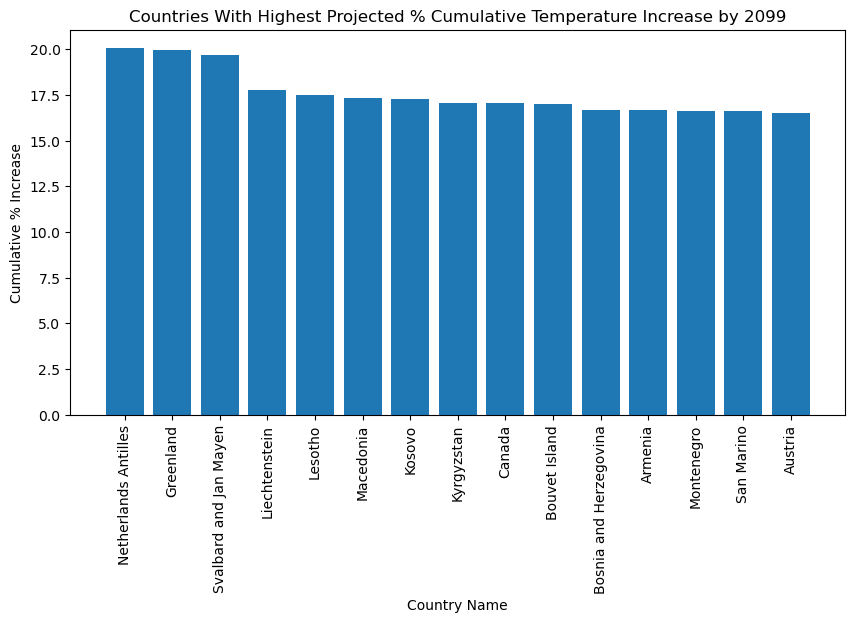

In [39]:
# Ploting: Projected % Comulative Temperature Increase by 2099

plt.figure(figsize=(10,5))
plt.bar(top_15['Country'], top_15['Projected % Cumulative Temperature Increase by 2099'])
plt.xticks(rotation=90)
plt.xlabel('Country Name')
plt.ylabel('Cumulative % Increase')
plt.title('Countries With Highest Projected % Cumulative Temperature Increase by 2099')
plt.show()



### Exploratory Data Analysis: Climate Projections - Results

This dataset contains information about the historical global surface temperature data for 1986-2005 and future temperature projections from 2020-2039 (the next 20 years), 204-2059 (mid-century), and 2080-2099 (late-century). Each country has an average temperature value for the respective ranges of years. The bar plot above shows the top 15 countries with the largest projected percent temperature increase. These countries are the ones that are most likely going to face the severe challenges of the climate crisis. In decreasing order these are the top 15 countries with the most projected temperature increase:


1. Netherlands Antilles - 20.1%
2. Greenland - 20.0%
3. Svalbard and Jan Mayen - 19.7%
4. Liechtenstein - 17.8%
5. Lesotho - 17.5%
6. Macedonia - 17.4%
7. Kosovo - 17.3%
8. Kyrgystan - 17.1%
9. Canada - 17.1%
10. Bouvet Island - 17.0%
11. Bosnia and Herzegovina - 16.7%
12. Armenia - 16.7%
13. Montenegro - 16.6%
14. San Marino - 16.6%
15. Austria - 16.5%

All of these countries have similar projected temperature increases. It is interesting to notice that many of these places are islands and in the northern part of the earth.

### Data Aquisition: Global Glacier Recession


5. GLIMS Glacier Database/ Contributions to Sea Level Rice: Largest Contributors to Global Water Cycle and Sea Level Rise by Reegion. Dataset contains the percentage of total Area and the percentage of contribution to volume change from 1961 to 2003. This analysis is focused on mountain glaciers and smaller ice caps, which have a total area at least 785x103 km2. Although they make up only 4% of the total land ice area, they may have contributed to as much as 30% of sea level change in the 20th century due to rapid ice volume reduction connected with global warming. The data needed was collected from this source via Web Scraping. 

**NSIDC: Glacier Melt** (https://nsidc.org/glims/glaciermelt).

In [40]:
# Glaciers web scraping 
tables2 = pd.read_html('https://nsidc.org/glims/glaciermelt')

# Retrieving Data
g2 = tables2[0]

# Printing Results
g2.head(3)

Largest Contributors to Global Water Cycle and Sea Level Rise  \
                                                         Region   
0                                             Arctic              
1                                 High Mountain Asia              
2                       Alaska and Coastal Mountains              

                            \
  Percentage of Total Area   
0                     52.7   
1                     19.4   
2                     15.0   

                                                          
  Percentage of Contribution to Volume Change  1961-2003  
0                                               31.5      
1                                               23.9      
2                                               23.0

### Data Preparation: Climate Projections

In [41]:
# Looking for null values
print(g2.isnull().sum())

# Shape of the data
print(g2.shape)

Largest Contributors to Global Water Cycle and Sea Level Rise  Region                                                    0
                                                               Percentage of Total Area                                  0
                                                               Percentage of Contribution to Volume Change  1961-2003    0
dtype: int64
(6, 3)


### Explotary Data Analysis: Global Glacier Recession

In [42]:
# Updating column titles for analysis

g2.columns = range(g2.shape[1])

updated_g2 = g2.rename(columns={0:'Location', 1:'percentage_total_area', 2:'volume_change_1961_2003'})

# Printing updated dataframe
updated_g2.head(6)

,Location,percentage_total_area,volume_change_1961_2003
0,Arctic,52.7,31.5
1,High Mountain Asia,19.4,23.9
2,Alaska and Coastal Mountains,15.0,23.0
3,NW USA and SW Canada,6.5,16.6
4,Patagonia Ice Fields,3.3,4.7
5,Europe,3.1,0.3


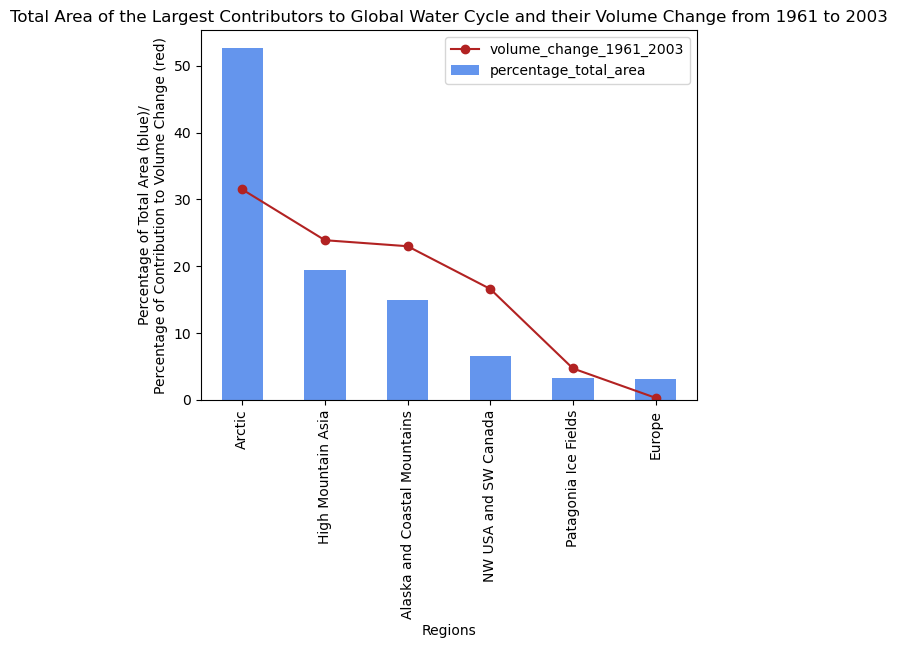

In [43]:
# Visualizing percentage of total area and volume change from 1961 to 2003
ax = updated_g2[['Location', 'volume_change_1961_2003']].plot(x='Location', linestyle='-', marker='o', color='firebrick')
updated_g2[['Location', 'percentage_total_area']].plot(x='Location', kind='bar', color='cornflowerblue',ax=ax)

plt.title('Total Area of the Largest Contributors to Global Water Cycle and their Volume Change from 1961 to 2003')
plt.xlabel('Regions')
plt.ylabel('Percentage of Total Area (blue)/''\n''Percentage of Contribution to Volume Change (red)')

plt.show()

### Exploratory Data Analysis: Global Glacier Reduction - Results

Based on the scatter and bar plot above, this dataset contains information about ther perdecntage total area and the percentage of contribution to the volume change of the sea leavel from 1911 to 2003 for 6 regions. The bar plot shows that the percent change of glacier surface area changed the most in the following regions in decreasing order:

1. Arctic - 52.7%
2. High Mountain Asia - 19.4%
3. Alaska and Costal Mountains - 15.0%
4. NW USA and SW Canada - 6.5%
5. Patagonia and Ice Fields - 3.3%
6. Europe - 3.1%

Following this, the scatter plot above shows that the percent of contribution to the volume change decreases in the same descending order as the surface area. This makes sense, the glaciers that lose more surface area will contribute more to the volume change of the sea level. In decreasing order, the percent volume change of the regions are as follows:

1. Arctic - 31.5%
2. High Mountain Asia - 23.9%
3. Alaska and Costal Mountains - 23.0%
4. NW USA and SW Canada - 16.6%
5. Patagonia and Ice Fields - 4.7%
6. Europe - 0.3%

Summarizing the graphs above, they show that there has been a rapid ice volume reduction. This agrees with the EDA section discussing the Glacier Mass Balance above.

### Exploratory Data Analysis: Surface Temperature Anomaly & Glaciers Mean Cumulative Mass Balance


In [44]:
# Updating Column Titles
read = read.rename(columns={'Surface temperature anomaly':'Surface_temperature_anomaly'})

# Filtering values - years before 1945
read1945 = read[(read.Year >= 1945)&(read.Year <= 2014)]

# Grouping by year to calculate avg temperature anomaly
read_mean = read1945.groupby(['Year']).Surface_temperature_anomaly.agg(['mean']).reset_index()

# Printing Results
read_mean.head(3)

,Year,mean
0,1945,-0.032235
1,1946,0.115165
2,1947,0.245301


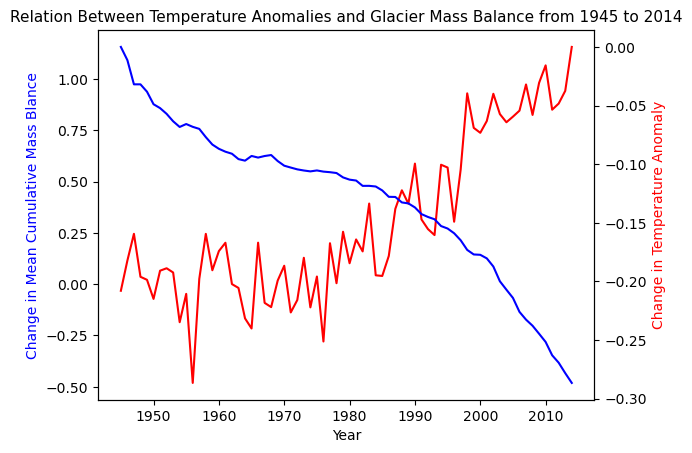

In [45]:
# Converting decimals in percentages 
glacier_mean = glacier[['Mean cumulative mass balance']]/100

# Plotting relationship between "Surface Temperature Anomaly" and "Mean cumulative mass balance" 

x = read_mean[['Year']]
y1= read_mean[['mean']]
y2= glacier_mean[['Mean cumulative mass balance']]


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x,y1, color='r')
ax2.plot(x,y2, color='b')
ax1.set_xlabel('Year')
ax1.set_ylabel('Change in Mean Cumulative Mass Blance', color='b')
ax2.set_ylabel('Change in Temperature Anomaly', color='r')

plt.title('Relation Between Temperature Anomalies and Glacier Mass Balance from 1945 to 2014', fontsize=11)
plt.show()


In [46]:
# Understanding Relationship between temperature anomalies and glaciers mass change 
read_m = read_mean[['mean']]
relationship = pd.merge(read_m, glacier_mean, left_index=True, right_index=True).rename(columns={'mean':'temp_mean','Mean cumulative mass balance':'glacier_mean'})

# Calculating Standard Correlation Coefficient
corr = relationship['temp_mean'].corr(relationship['glacier_mean'])
corr

-0.8613173446158233

### Exploratory Data Analysis: Surface Temperature Anomaly vs. Glacier Mass Balance - Results

Based on the line plot above, this compares the information about global surface temperature anomalies (in red) and the glacier mass balance (in blue). This graph shows a steady increase in the global surface temperature over time and a steady decrease in glacier mass balance. Both have a correlation value of **-0.86**. This suggests that there is a strong negative relationship between the surface temperature anomaly and the glacier mass. This kind of relationship was expected. It is interesting to notice that when the temperature anomaly started steeply increasing, around 1990, the glacier mass balance also starts to steeply decrease.

### Exploratory Data Analysis: Surface Temperature Anomaly & Deaths Caused By Natural Disasters

In [47]:
# Stablishing the lenght of the years for the analysis
read1990 = read[(read.Year >= 1990)&(read.Year <= 2017)]
# Grouping by year and calculating the mean
read_1990 = read1990.groupby(['Year']).Surface_temperature_anomaly.agg(['mean']).reset_index()

# Printing updated dataframe
read_1990.head(3)

,Year,mean
0,1990,0.587268
1,1991,0.315464
2,1992,0.268135


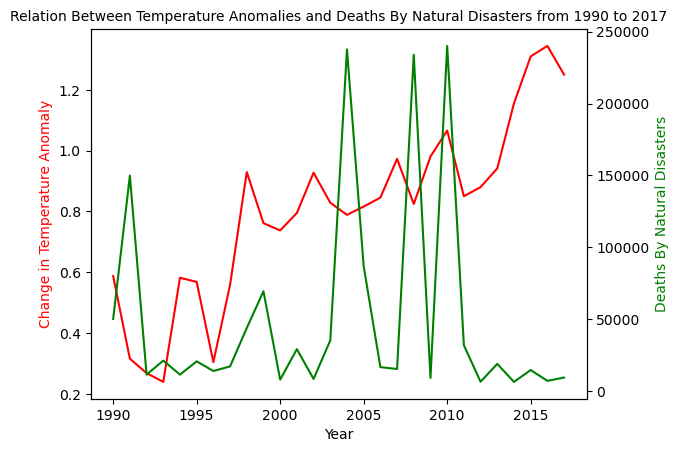

In [48]:
# Plotting relationship between temperature anomalies and deaths caused by natural disasters
x = read_1990[['Year']]
y1= read_1990[['mean']]
y2= total_by_country[['sum']]


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x,y1, color='r')
ax2.plot(x,y2, color='g')
ax1.set_xlabel('Year')
ax1.set_ylabel('Change in Temperature Anomaly', color='r')
ax2.set_ylabel('Deaths By Natural Disasters', color='g')

plt.title('Relation Between Temperature Anomalies and Deaths By Natural Disasters from 1990 to 2017', fontsize=10)
plt.show()


In [49]:
# Selecting columns to perform the analysis
read_1990 = read_1990[['mean']].reset_index(drop=True)
total_1990 = total_by_country[['sum']].reset_index(drop=True)


# Combining both values in the same dataframe
relation = pd.merge(read_1990, total_1990, left_index=True, right_index=True).rename(columns={'mean':'temp_mean','sum':'total_deaths'})

# Calculating Standard Correlation Coefficient
corr1 = relation['temp_mean'].corr(relation['total_deaths'])

# Printing results
corr1

-0.03557230315248272

### Exploratory Data Analysis: Surface Temperature Anomaly vs. Deaths by Natrural Disasters - Results

Based on the line plot above, this compares the information about global surface temerpature anomalies (in red) and the deaths by natural disasters (in green). This graph shows a steady increase in the global surface temperature over time and a few strong peaks of deaths amongst a relatively consistent number of deaths. The correlation value between both of these variables is -0.03. This suggests that there is a weak negative relationship between the surface temperature anomaly and the number of death by natural disasters. It is interesting to notice some of the temperature peaks somewhat correlate with the natureal disasters, but not exactly. It is important to keep in mind that the weak negative correlation between the variables does not indication that there is no secondary relationship at all. Correlation does not imply causation after all.

## Phase 2 - Visualization with GeoPandas

To visualize global data serparared by many locations such as country, a map is the most intuative method. Both the Global Surface Temperature Anomaly Data from the GISTEMP analysis by NASA Goddard Institute of Space Studie and the Climate Projections Data form the Climate Impact Lab have temperature data that would be well illustrated in a mpa format. To do this, the GeoPandas package comes in handy.

**GeoPandas:** The GeoPandas package is an open-source project to make working with geospatial data in Python easier. It is an extension of the panda’s package to allow spatial operations on geometric types (define a spatial location and an association geometric type). It allows the user to do GIS. 

### Global Surface Temperature Anomaly Map

The Global Surface Temperature Anomaly data is organized by year and country. To map this data the country information will be joined to a shape file in a GeoPandas dataframe. This contains information about the surface temperature anomaly data and the geospatial data needed to create a map. The process for this is outlined in the code below.

**Shapefile:** A shapefile is a geospatial vector data format for geographic information software (GIS). This shapefile was sources from ___ and contains information about countries, their two and three digit codes, country names in various languages, continent information, square kilometers, latitude and longitude information in a geometry format, among some other information. This type of file can be read by the geopandas package to help make mapping easier.

The first step is to load the shapefile into a geodataframe and confirm that it is a GeoDataFrame.

In [50]:
#read the shapefile using geopandas
fp = '/Users/Puji/Desktop/countries_shp/countries.shp'

map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
type(map_df)

geopandas.geodataframe.GeoDataFrame

In [51]:
map_df.head()

,OBJECTID,NAME,ISO3,ISO2,FIPS,COUNTRY,ENGLISH,FRENCH,SPANISH,LOCAL,FAO,WAS_ISO,SOVEREIGN,CONTINENT,UNREG1,UNREG2,EU,SQKM,geometry
0,1,Åland,ALA,AX,AX,Åland,Åland,None,None,Åland,None,None,Finland,Europe,Northern Europe,Europe,0,1.243719e+03,"MULTIPOLYGON (((20.99567 60.64228, 20.99261 60..."
1,2,Afghanistan,AFG,AF,AF,Afghanistan,Afghanistan,Afghanistan,Afganistán,Afghanestan,Afghanistan,None,Afghanistan,Asia,Southern Asia,Asia,0,6.413834e+05,"POLYGON ((73.27336 36.88856, 73.26195 36.89025..."
2,3,Albania,ALB,AL,AL,Albania,Albania,Albanie,Albania,Shqiperia,Albania,None,Albania,Europe,Southern Europe,Europe,0,2.848611e+04,"MULTIPOLYGON (((20.98057 40.85522, 20.98096 40..."
3,4,Algeria,DZA,DZ,AG,Algeria,Algeria,Algérie,Argelia,Al Jaza'ir,Algeria,None,Algeria,Africa,Northern Africa,Africa,0,2.316559e+06,"MULTIPOLYGON (((-8.67387 27.29807, -8.67172 27..."
4,5,American Samoa,ASM,AS,AQ,American Samoa,American Samoa,Samoa Américaines,Samoa Americana,American Samoa,American Samoa,None,United States,Oceania,Polynesia,Oceania,0,2.110151e+02,"MULTIPOLYGON (((-171.07492 -11.06860, -171.078..."


Now that we have the shapefile and the surface temperature anomaly data, we can join the dataframes. Here we will use the three digit country code to do this join. For the GISTEMP data that is the `Code` column, for the shapefile that is the `ISO3` column.

In [52]:
#join the geodataframe with the cleaned up csv dataframe
merged = map_df.set_index('ISO3').join(read.set_index('Code'))
merged.columns

Index(['OBJECTID', 'NAME', 'ISO2', 'FIPS', 'COUNTRY', 'ENGLISH', 'FRENCH',
       'SPANISH', 'LOCAL', 'FAO', 'WAS_ISO', 'SOVEREIGN', 'CONTINENT',
       'UNREG1', 'UNREG2', 'EU', 'SQKM', 'geometry', 'Entity', 'Year',
       'Surface_temperature_anomaly'],
      dtype='object')

In [53]:
merged['Surface_temperature_anomaly'].min()

-4.7

With this combined dataframe, we can create a function to isolate the data by year and graph it with a slider. Additionally, the slider range and step can be adjusted as desired. This can be seen in the map plot below.

In [54]:
#create dataframe organized by year
mergedworld = pd.DataFrame()
for i in merged['Year'].unique():
    mergetemp=merged[merged['Year']==i]
    mergedworld = mergedworld.append(mergetemp)
    
mergedworld

#create function that brings a geodataframe with a particular year value
def worldplot(date):
    map_year = merged.loc[merged['Year'] == date]
    map_year.plot('Surface_temperature_anomaly', vmin=-5, vmax=4, cmap = 'hot', figsize=(22,11), legend = True)

#draw an interactive plot for a range of years
#the year range is from 1881 to 2017
#here we are looking at 2000 to 2017
interact(worldplot, date=(1978,2017,3))

interactive(children=(IntSlider(value=1996, description='date', max=2017, min=1978, step=3), Output()), _dom_c…

<function __main__.worldplot(date)>

### Global Surface Temperature Anomaly: Results

We know from our Exploratory Data Analysis that the global surface temperature anomaly shows an increasing trend from the years of 1881 to 2017. The scatter plot illustrating the Average Surface Temperature Anomaly by year tells us that there is a steep increase of this values from 1980 to 2017.

Using the map above to view the temperature anomalies globally over a range of year further illustrates this pattern. For example, setting the slider from 1978 to 2017 with a step of 3 shows how the surface temperature has drastically increased in this time.


### Global Surface Temperature Projection Maps


The Global Surface Temperature Projection data is organized by country name and temperature values. To map this data the country name information will be joined to the country name in the shapefile GeoPandas dataframe. This contains information about the historical and projected surface temperature and the geospatial data from the shapefile is needed to plot the map. There are four separate dataframes that sum up the projections for this century; the first one is historical from 1986 to 2005, the other three dataframe are calculated projections spanning the following year ranges: 2020-2039 2040-2059, and 2080-2099. The process for this is outlined in the code below.

The first step is to join the dataframes to the historical temperature dataframe. The will be joined on the `NAME` column on the shapefile and the `Average` column for the historical data. After joining, then we have to check if there are any null values.

In [55]:
AVG_1986_to_2005 = AVG_1986_to_2005.rename(columns={'AVG_1986_to_2005':'Average'})
AVG_1986_to_2005.head()

,Country,Average
0,Aruba,80.6
1,Afghanistan,74
2,Angola,68.5
3,Anguilla,79.8
4,�land Islands,58.5


In [56]:
geo8605 = map_df.set_index('NAME').join(AVG_1986_to_2005.set_index('Country'))
geo8605_null= geo8605[geo8605['Average'].isna()]
geo8605_null

,OBJECTID,ISO3,ISO2,FIPS,COUNTRY,ENGLISH,FRENCH,SPANISH,LOCAL,FAO,WAS_ISO,SOVEREIGN,CONTINENT,UNREG1,UNREG2,EU,SQKM,geometry,Average
Andorra,6,AND,AD,AN,Andorra,Andorra,Andorre,Andorra,Andorra,Andorra,None,Andorra,Europe,Southern Europe,Europe,0,4.746375e+02,"POLYGON ((1.724 42.504, 1.702 42.493, 1.693 42...",NaN
Antarctica,9,ATA,AQ,AY,Antarctica,Antarctica,Antarctique,Antártida,Antarctica,None,None,None,Antartica,Antartica,Antartica,0,1.253878e+07,"MULTIPOLYGON (((-45.664 -60.528, -45.655 -60.5...",NaN
Ashmore and Cartier Islands,14,AUS,AU,AS,Australia,Australia,Australie,Australia,Australia,Australia,None,Australia,Oceania,Australia and New Zealand,Oceania,0,2.645992e+00,"MULTIPOLYGON (((122.940 -12.257, 122.935 -12.2...",NaN
Baker Island,20,BRN,BN,BX,Brunei,Brunei,Brunéi Darussalam,Brunei Darussalam,Negara Brunei Darussalam,Brunei Darussalam,None,Brunei Darussalam,Asia,South-Eastern Asia,Asia,0,5.880120e+03,"MULTIPOLYGON (((114.071 4.589, 114.118 4.588, ...",NaN
Baker Island,21,UMI,UM,WQ,United States Minor Outlying Islands,United States Minor Outlying Islands,Îles Mineures Éloignées des États-Unis,None,United States Minor Outlying Island,None,None,United States,Oceania,Micronesia,Oceania,0,1.267776e+00,"POLYGON ((-176.482 0.207, -176.476 0.206, -176...",NaN
Burma,40,MMR,MM,BM,Myanmar,Myanmar,"Myanmar, Birmanie","Myanmar, Birmania",Myanma Naingngandaw,Myanmar,None,Myanmar,Asia,South-Eastern Asia,Asia,0,6.678711e+05,"MULTIPOLYGON (((93.991 19.145, 93.978 19.137, ...",NaN
Congo (Democratic Republic of the),57,COD,CD,CG,Democratic Republic of the Congo,Democratic Republic of the Congo,"Congo, La République Démocratique du|Zaïre",República Democrática del Congo,République Démocratique du Congo|Zaire,Democratic Republic of the Congo,None,The Democratic Republic of the Congo,Africa,Middle Africa,Africa,0,2.327986e+06,"MULTIPOLYGON (((28.765 -12.944, 28.756 -12.938...",NaN
Coral Sea Islands,59,AUS,AU,AS,Australia,Australia,Australie,Australia,Australia,Australia,None,Australia,Oceania,Australia and New Zealand,Oceania,0,1.237409e+01,"MULTIPOLYGON (((149.146 -16.034, 149.142 -16.0...",NaN
Curaçao,63,CUW,CW,UC,Curaçao,Curacao,None,None,Curaçao,None,ANT,Netherlands,South America,Caribbean,Americas,0,4.472467e+02,"MULTIPOLYGON (((-69.045 12.265, -69.039 12.252...",NaN
Côte d'Ivoire,66,CIV,CI,IV,Côte d'Ivoire,Côte d'Ivoire,Côte D'ivoire,Costa de Marfil,Côte d'Ivoire,Cte d'Ivoire,None,Côte d'Ivoire,Africa,Western Africa,Africa,0,3.218819e+05,"MULTIPOLYGON (((-3.021 5.800, -3.020 5.791, -3...",NaN


We can see that there are null values. This is because the historical and projections temperature data only have country names and no identifying code. Some country names are written differently and thus they are not joined together. This can be fixed manually by replacing these country names and rejoining the dataframes.

In [57]:
AVG_1986_to_2005['Country'] = AVG_1986_to_2005['Country'].replace(
    ['Antarctica','Democratic Republic of the Congo','Cura�ao','Falkland Islands','Libyan Arab Jamahiriya',
     'Democratic People`s Republic of Korea (North Korea)','Syrian Arab Republic','United Republic of Tanzania',
     'Vatican','Virgin Islands (US)', 'Republic of Korea (South Korea)', 'United States of America', 
     'Russian Federation','Viet Nam', 'United Republic of Tanzania', 'R�union', 'Pitcairn', 'Myanmar'],
    ['Antarctica','Congo (Democratic Republic of the)','Curaçao','Falkland Islands (Islas Malvinas)','Libya',
     'North Korea','Syria','Tanzania','Vatican City','Virgin Islands', 'South Korea', 'United States', 
     'Russia', 'Vietnam', 'Tanzania', 'Reunion', 'Pitcairn Islands', 'Burma'])

After this, we can change the data type of the temperature column to float. This makes the plot legend in the form of a color bar. Which is what we want.

The rest of the projected temperature dataframes follow the same process of joining with the shapefile and adjusting the country names.

In [58]:
geo8605 = map_df.set_index('NAME').join(AVG_1986_to_2005.set_index('Country'))
geo8605['Average'] = geo8605['Average'].astype('float')


In [59]:
PROJECTION_2020_to_2039.head()

,Country,5th,50th,95th
0,Aruba,81.1,82.1,83
1,Afghanistan,74.9,76.7,79.9
2,Angola,69.7,70.7,71.9
3,Anguilla,80.1,80.8,81.6
4,�land Islands,59.2,60.9,63.8


In [60]:
geo2039 = map_df.set_index('NAME').join(PROJECTION_2020_to_2039.set_index('Country'))
geo2039_null= geo2039[geo2039['50th'].isna()]
geo2039_null

,OBJECTID,ISO3,ISO2,FIPS,COUNTRY,ENGLISH,FRENCH,SPANISH,LOCAL,FAO,...,SOVEREIGN,CONTINENT,UNREG1,UNREG2,EU,SQKM,geometry,5th,50th,95th
Andorra,6,AND,AD,AN,Andorra,Andorra,Andorre,Andorra,Andorra,Andorra,...,Andorra,Europe,Southern Europe,Europe,0,4.746375e+02,"POLYGON ((1.724 42.504, 1.702 42.493, 1.693 42...",NaN,NaN,NaN
Antarctica,9,ATA,AQ,AY,Antarctica,Antarctica,Antarctique,Antártida,Antarctica,None,...,None,Antartica,Antartica,Antartica,0,1.253878e+07,"MULTIPOLYGON (((-45.664 -60.528, -45.655 -60.5...",NaN,NaN,NaN
Ashmore and Cartier Islands,14,AUS,AU,AS,Australia,Australia,Australie,Australia,Australia,Australia,...,Australia,Oceania,Australia and New Zealand,Oceania,0,2.645992e+00,"MULTIPOLYGON (((122.940 -12.257, 122.935 -12.2...",NaN,NaN,NaN
Baker Island,20,BRN,BN,BX,Brunei,Brunei,Brunéi Darussalam,Brunei Darussalam,Negara Brunei Darussalam,Brunei Darussalam,...,Brunei Darussalam,Asia,South-Eastern Asia,Asia,0,5.880120e+03,"MULTIPOLYGON (((114.071 4.589, 114.118 4.588, ...",NaN,NaN,NaN
Baker Island,21,UMI,UM,WQ,United States Minor Outlying Islands,United States Minor Outlying Islands,Îles Mineures Éloignées des États-Unis,None,United States Minor Outlying Island,None,...,United States,Oceania,Micronesia,Oceania,0,1.267776e+00,"POLYGON ((-176.482 0.207, -176.476 0.206, -176...",NaN,NaN,NaN
Burma,40,MMR,MM,BM,Myanmar,Myanmar,"Myanmar, Birmanie","Myanmar, Birmania",Myanma Naingngandaw,Myanmar,...,Myanmar,Asia,South-Eastern Asia,Asia,0,6.678711e+05,"MULTIPOLYGON (((93.991 19.145, 93.978 19.137, ...",NaN,NaN,NaN
Congo (Democratic Republic of the),57,COD,CD,CG,Democratic Republic of the Congo,Democratic Republic of the Congo,"Congo, La République Démocratique du|Zaïre",República Democrática del Congo,République Démocratique du Congo|Zaire,Democratic Republic of the Congo,...,The Democratic Republic of the Congo,Africa,Middle Africa,Africa,0,2.327986e+06,"MULTIPOLYGON (((28.765 -12.944, 28.756 -12.938...",NaN,NaN,NaN
Coral Sea Islands,59,AUS,AU,AS,Australia,Australia,Australie,Australia,Australia,Australia,...,Australia,Oceania,Australia and New Zealand,Oceania,0,1.237409e+01,"MULTIPOLYGON (((149.146 -16.034, 149.142 -16.0...",NaN,NaN,NaN
Curaçao,63,CUW,CW,UC,Curaçao,Curacao,None,None,Curaçao,None,...,Netherlands,South America,Caribbean,Americas,0,4.472467e+02,"MULTIPOLYGON (((-69.045 12.265, -69.039 12.252...",NaN,NaN,NaN
Côte d'Ivoire,66,CIV,CI,IV,Côte d'Ivoire,Côte d'Ivoire,Côte D'ivoire,Costa de Marfil,Côte d'Ivoire,Cte d'Ivoire,...,Côte d'Ivoire,Africa,Western Africa,Africa,0,3.218819e+05,"MULTIPOLYGON (((-3.021 5.800, -3.020 5.791, -3...",NaN,NaN,NaN


In [61]:
PROJECTION_2020_to_2039['Country'] = PROJECTION_2020_to_2039['Country'].replace(
    ['Antarctica','Democratic Republic of the Congo','Cura�ao','Falkland Islands','Libyan Arab Jamahiriya',
     'Democratic People`s Republic of Korea (North Korea)','Syrian Arab Republic','United Republic of Tanzania',
     'Vatican','Virgin Islands (US)', 'Republic of Korea (South Korea)', 'United States of America', 
     'Russian Federation','Viet Nam', 'United Republic of Tanzania', 'R�union', 'Pitcairn', 'Myanmar'],
    ['Antarctica','Congo (Democratic Republic of the)','Curaçao','Falkland Islands (Islas Malvinas)','Libya',
     'North Korea','Syria','Tanzania','Vatican City','Virgin Islands', 'South Korea', 'United States', 
     'Russia', 'Vietnam', 'Tanzania', 'Reunion', 'Pitcairn Islands', 'Burma'])

In [62]:
geo2039 = map_df.set_index('NAME').join(PROJECTION_2020_to_2039.set_index('Country'))
geo2039['50th'] = geo2039['50th'].astype('float')


In [63]:
PROJECTION_2040_to_2059.head()

,Country,5th,50th,95th
0,Aruba,81.3,83.2,84.9
1,Afghanistan,76.5,78.7,83.2
2,Angola,70.9,72.3,74.6
3,Anguilla,80.1,82,83.2
4,�land Islands,60.3,62.5,66.5


In [64]:
geo4059 = map_df.set_index('NAME').join(PROJECTION_2040_to_2059.set_index('Country'))
geo4059_null= geo4059[geo4059['50th'].isna()]
geo4059_null

,OBJECTID,ISO3,ISO2,FIPS,COUNTRY,ENGLISH,FRENCH,SPANISH,LOCAL,FAO,...,SOVEREIGN,CONTINENT,UNREG1,UNREG2,EU,SQKM,geometry,5th,50th,95th
Andorra,6,AND,AD,AN,Andorra,Andorra,Andorre,Andorra,Andorra,Andorra,...,Andorra,Europe,Southern Europe,Europe,0,4.746375e+02,"POLYGON ((1.724 42.504, 1.702 42.493, 1.693 42...",NaN,NaN,NaN
Antarctica,9,ATA,AQ,AY,Antarctica,Antarctica,Antarctique,Antártida,Antarctica,None,...,None,Antartica,Antartica,Antartica,0,1.253878e+07,"MULTIPOLYGON (((-45.664 -60.528, -45.655 -60.5...",NaN,NaN,NaN
Ashmore and Cartier Islands,14,AUS,AU,AS,Australia,Australia,Australie,Australia,Australia,Australia,...,Australia,Oceania,Australia and New Zealand,Oceania,0,2.645992e+00,"MULTIPOLYGON (((122.940 -12.257, 122.935 -12.2...",NaN,NaN,NaN
Baker Island,20,BRN,BN,BX,Brunei,Brunei,Brunéi Darussalam,Brunei Darussalam,Negara Brunei Darussalam,Brunei Darussalam,...,Brunei Darussalam,Asia,South-Eastern Asia,Asia,0,5.880120e+03,"MULTIPOLYGON (((114.071 4.589, 114.118 4.588, ...",NaN,NaN,NaN
Baker Island,21,UMI,UM,WQ,United States Minor Outlying Islands,United States Minor Outlying Islands,Îles Mineures Éloignées des États-Unis,None,United States Minor Outlying Island,None,...,United States,Oceania,Micronesia,Oceania,0,1.267776e+00,"POLYGON ((-176.482 0.207, -176.476 0.206, -176...",NaN,NaN,NaN
Burma,40,MMR,MM,BM,Myanmar,Myanmar,"Myanmar, Birmanie","Myanmar, Birmania",Myanma Naingngandaw,Myanmar,...,Myanmar,Asia,South-Eastern Asia,Asia,0,6.678711e+05,"MULTIPOLYGON (((93.991 19.145, 93.978 19.137, ...",NaN,NaN,NaN
Congo (Democratic Republic of the),57,COD,CD,CG,Democratic Republic of the Congo,Democratic Republic of the Congo,"Congo, La République Démocratique du|Zaïre",República Democrática del Congo,République Démocratique du Congo|Zaire,Democratic Republic of the Congo,...,The Democratic Republic of the Congo,Africa,Middle Africa,Africa,0,2.327986e+06,"MULTIPOLYGON (((28.765 -12.944, 28.756 -12.938...",NaN,NaN,NaN
Coral Sea Islands,59,AUS,AU,AS,Australia,Australia,Australie,Australia,Australia,Australia,...,Australia,Oceania,Australia and New Zealand,Oceania,0,1.237409e+01,"MULTIPOLYGON (((149.146 -16.034, 149.142 -16.0...",NaN,NaN,NaN
Curaçao,63,CUW,CW,UC,Curaçao,Curacao,None,None,Curaçao,None,...,Netherlands,South America,Caribbean,Americas,0,4.472467e+02,"MULTIPOLYGON (((-69.045 12.265, -69.039 12.252...",NaN,NaN,NaN
Côte d'Ivoire,66,CIV,CI,IV,Côte d'Ivoire,Côte d'Ivoire,Côte D'ivoire,Costa de Marfil,Côte d'Ivoire,Cte d'Ivoire,...,Côte d'Ivoire,Africa,Western Africa,Africa,0,3.218819e+05,"MULTIPOLYGON (((-3.021 5.800, -3.020 5.791, -3...",NaN,NaN,NaN


In [65]:
PROJECTION_2040_to_2059['Country'] = PROJECTION_2040_to_2059['Country'].replace(
    ['Antarctica','Democratic Republic of the Congo','Cura�ao','Falkland Islands','Libyan Arab Jamahiriya',
     'Democratic People`s Republic of Korea (North Korea)','Syrian Arab Republic','United Republic of Tanzania',
     'Vatican','Virgin Islands (US)', 'Republic of Korea (South Korea)', 'United States of America', 
     'Russian Federation','Viet Nam', 'United Republic of Tanzania', 'R�union', 'Pitcairn', 'Myanmar'],
    ['Antarctica','Congo (Democratic Republic of the)','Curaçao','Falkland Islands (Islas Malvinas)','Libya',
     'North Korea','Syria','Tanzania','Vatican City','Virgin Islands', 'South Korea', 'United States', 
     'Russia', 'Vietnam', 'Tanzania', 'Reunion', 'Pitcairn Islands', 'Burma'])

In [66]:
geo4059 = map_df.set_index('NAME').join(PROJECTION_2040_to_2059.set_index('Country'))
geo4059['50th'] = geo4059['50th'].astype('float')


In [67]:
PROJECTION_2080_to_2099.head()

,Country,5th,50th,95th
0,Aruba,83.6,85.7,90.5
1,Afghanistan,80.5,84.1,95.6
2,Angola,73.6,75.7,83.2
3,Anguilla,82.4,84.6,87.8
4,�land Islands,63.1,66.5,75.5


In [68]:
geo8099 = map_df.set_index('NAME').join(PROJECTION_2080_to_2099.set_index('Country'))
geo8099_null= geo8099[geo8099['50th'].isna()]
geo8099_null

,OBJECTID,ISO3,ISO2,FIPS,COUNTRY,ENGLISH,FRENCH,SPANISH,LOCAL,FAO,...,SOVEREIGN,CONTINENT,UNREG1,UNREG2,EU,SQKM,geometry,5th,50th,95th
Andorra,6,AND,AD,AN,Andorra,Andorra,Andorre,Andorra,Andorra,Andorra,...,Andorra,Europe,Southern Europe,Europe,0,4.746375e+02,"POLYGON ((1.724 42.504, 1.702 42.493, 1.693 42...",NaN,NaN,NaN
Antarctica,9,ATA,AQ,AY,Antarctica,Antarctica,Antarctique,Antártida,Antarctica,None,...,None,Antartica,Antartica,Antartica,0,1.253878e+07,"MULTIPOLYGON (((-45.664 -60.528, -45.655 -60.5...",NaN,NaN,NaN
Ashmore and Cartier Islands,14,AUS,AU,AS,Australia,Australia,Australie,Australia,Australia,Australia,...,Australia,Oceania,Australia and New Zealand,Oceania,0,2.645992e+00,"MULTIPOLYGON (((122.940 -12.257, 122.935 -12.2...",NaN,NaN,NaN
Baker Island,20,BRN,BN,BX,Brunei,Brunei,Brunéi Darussalam,Brunei Darussalam,Negara Brunei Darussalam,Brunei Darussalam,...,Brunei Darussalam,Asia,South-Eastern Asia,Asia,0,5.880120e+03,"MULTIPOLYGON (((114.071 4.589, 114.118 4.588, ...",NaN,NaN,NaN
Baker Island,21,UMI,UM,WQ,United States Minor Outlying Islands,United States Minor Outlying Islands,Îles Mineures Éloignées des États-Unis,None,United States Minor Outlying Island,None,...,United States,Oceania,Micronesia,Oceania,0,1.267776e+00,"POLYGON ((-176.482 0.207, -176.476 0.206, -176...",NaN,NaN,NaN
Burma,40,MMR,MM,BM,Myanmar,Myanmar,"Myanmar, Birmanie","Myanmar, Birmania",Myanma Naingngandaw,Myanmar,...,Myanmar,Asia,South-Eastern Asia,Asia,0,6.678711e+05,"MULTIPOLYGON (((93.991 19.145, 93.978 19.137, ...",NaN,NaN,NaN
Congo (Democratic Republic of the),57,COD,CD,CG,Democratic Republic of the Congo,Democratic Republic of the Congo,"Congo, La République Démocratique du|Zaïre",República Democrática del Congo,République Démocratique du Congo|Zaire,Democratic Republic of the Congo,...,The Democratic Republic of the Congo,Africa,Middle Africa,Africa,0,2.327986e+06,"MULTIPOLYGON (((28.765 -12.944, 28.756 -12.938...",NaN,NaN,NaN
Coral Sea Islands,59,AUS,AU,AS,Australia,Australia,Australie,Australia,Australia,Australia,...,Australia,Oceania,Australia and New Zealand,Oceania,0,1.237409e+01,"MULTIPOLYGON (((149.146 -16.034, 149.142 -16.0...",NaN,NaN,NaN
Curaçao,63,CUW,CW,UC,Curaçao,Curacao,None,None,Curaçao,None,...,Netherlands,South America,Caribbean,Americas,0,4.472467e+02,"MULTIPOLYGON (((-69.045 12.265, -69.039 12.252...",NaN,NaN,NaN
Côte d'Ivoire,66,CIV,CI,IV,Côte d'Ivoire,Côte d'Ivoire,Côte D'ivoire,Costa de Marfil,Côte d'Ivoire,Cte d'Ivoire,...,Côte d'Ivoire,Africa,Western Africa,Africa,0,3.218819e+05,"MULTIPOLYGON (((-3.021 5.800, -3.020 5.791, -3...",NaN,NaN,NaN


In [69]:
PROJECTION_2080_to_2099['Country'] = PROJECTION_2080_to_2099['Country'].replace(
    ['Antarctica','Democratic Republic of the Congo','Cura�ao','Falkland Islands','Libyan Arab Jamahiriya',
     'Democratic People`s Republic of Korea (North Korea)','Syrian Arab Republic','United Republic of Tanzania',
     'Vatican','Virgin Islands (US)', 'Republic of Korea (South Korea)', 'United States of America', 
     'Russian Federation','Viet Nam', 'United Republic of Tanzania', 'R�union', 'Pitcairn', 'Myanmar'],
    ['Antarctica','Congo (Democratic Republic of the)','Curaçao','Falkland Islands (Islas Malvinas)','Libya',
     'North Korea','Syria','Tanzania','Vatican City','Virgin Islands', 'South Korea', 'United States', 
     'Russia', 'Vietnam', 'Tanzania', 'Reunion', 'Pitcairn Islands', 'Burma'])

In [70]:
geo8099 = map_df.set_index('NAME').join(PROJECTION_2080_to_2099.set_index('Country'))
geo8099['50th'] = geo8099['50th'].astype('float')


After the appropriate dataframes are created for historical, next 20 year, mid-century, and late-century temperature values, a function can be written to plot these graphs. This function takes an input from the slider bar and plots the appopriate map. Both the map and the function are in the cell below.

In [71]:
project_mergedworld = pd.DataFrame()

projections_plots = (geo8605, geo2039, geo4059, geo8099)

def projections_worldplot(date):
    if date == 1:
        geo8605.plot('Average', vmin=0, vmax=110, cmap='hot', figsize=(22,11), legend = True)
    if date == 2:
        geo2039.plot('50th', vmin=0, vmax=110, cmap='hot', figsize=(22,11), legend = True)
    if date == 3:
        geo4059.plot('50th', vmin=0, vmax=110, cmap='hot', figsize=(22,11), legend = True)
    if date == 4:
        geo8099.plot('50th', vmin=0, vmax=110, cmap='hot', figsize=(22,11), legend = True)
        
#interact(worldplot, date=range(1880,2018))
interact(projections_worldplot, date=(1,4,1))

interactive(children=(IntSlider(value=2, description='date', max=4, min=1), Output()), _dom_classes=('widget-i…

<function __main__.projections_worldplot(date)>

### Global Surface Temperature Projection Map: Results

We know from our Exploratory Data Analysis that the global surface temerpature anomaly shows an increasing trend from the for the ranges of years provided. Using the map above to view the global temperature projections over a range of years for the century further illustrates this pattern. The slider takes us through the following timeline:

1. Historical: 1986 - 2005
2. The Next 20 Years: 2020 - 2039
3. Mid-Century: 2040 - 2059
4. Late-Century: 2089 - 2099.

The increase in global temperature can be seen by the increase in yellow in the map above.

## Results and Conclusions

From the EDA and the Geoplots in the previous sections we can answer our research questions.

**What are the trends in global surface temperature?**
The trends in global surface temperature have shown a steady increase from 1986 to 2017 with a particularly steep rate of increase from 1980 onwards. Based on future climate predictions, there will continue to be an increase in global surface temperature, continuing this trend until at least the end of the century.

**How do global temperature trends affect glaciers?**
The increase in global temperature decreases the mean glacier mass. These two variable have a large negative correlation. This is expected and due to the continuing increase in surface temperature, the glacier mass will continue to lessen. The glaciers in the arctic region have decrease in surface area the most and contribute the most to the percent volume increase in the sea level.

**How do global temperature trends affect the number of deaths by natural disasters?**
The global surface temperature anomaly has a weak negative correlation with the deaths by natural disasters. Although these are not strongly correlated, this does not mean they are unconnected. There are some significant natural disasters that occur during temperature spikes. This would be an interested area to continue research in.

This type of work and visualization would be greatly beneficial for climate scientists, environmental agencies, those in natural disaster prevention industries, and anyone interested in learning about climate data, amongst others. This project can be further expanded by looking at more climate variable and finding more relationships between global temperature trends and metrics that impact human life.
